# Final Project

In [98]:
# 移除不必要的警告
import warnings
warnings.filterwarnings('ignore')

### 獲取歷史資料

In [99]:
from finlab.data import Data
#from finlab.ml import fundamental_features
#fdf = fundamental_features()

data = Data()

close = data.get("收盤價")
open_ = data.get("開盤價")
high = data.get("最高價")
low = data.get("最低價")
vol = data.get("成交股數")

PB = data.get("股價淨值比")
pe = data.get("本益比")

#bi = data.get("營業利益")


#close = data.get_adj("收盤價").round(2)

#財務指標
rev = data.get("當月營收")
l_rev = data.get("去年當月營收")

#t123 = data.get('土地')

bargin_i=data.get("投信買賣超股數")/data.get("成交股數")
bargin_f=data.get("外資自營商買賣超股數")/data.get("成交股數")
bargin_s=data.get("自營商買賣超股數(自行買賣)")/data.get("成交股數")
#

vol=data.get('成交股數')/1000
vol_ma5=vol.rolling(5).mean()

rev.index = rev.index.shift(5, "d")         #每月頻率
#周頻率

### 計算features

In [100]:
#MFI  = data.talib("MFI")
##MFI.tail()
#ub,mb,lb =data.talib("BBANDS")

#### 營收相關

In [101]:
##############################################　　　自己加入的　　　##############################################
import pandas as pd
from finlab.__init__ import talib_all_stock
from talib import abstract

In [102]:
def bias(n):
    return close / close.rolling(n, min_periods=1).mean()

def acc(n):
    return close.shift(n) / (close.shift(2*n) + close) * 2

def rsv(n):
    l = close.rolling(n, min_periods=1).min() 
    h = close.rolling(n, min_periods=1).max()
    
    return (close - l) / (h - l)

def mom(n):
    return (rev / rev.shift(1)).shift(n)

def yoy(n):
    return (rev.shift(n) / rev.shift(12+n)) -1

def bi(n):
    return bargin_i/bargin_i.rolling(n).mean()

def bf(n):
    return bargin_f/bargin_f.rolling(n).mean()
    
def bs(n):
    return bargin_s/bargin_s.rolling(n).mean()

#-------------------------------------------

features = {
    'mom1': mom(1),
    'mom2': mom(2),
    'mom3': mom(3),
    'mom4': mom(4),
    'mom5': mom(5),
    'mom6': mom(6),
    'mom7': mom(7),
    'mom8': mom(8),
    'mom9': mom(9),

    
    'bias5': bias(5),
    'bias10': bias(10),
    'bias20': bias(20),
    'bias60': bias(60),
    'bias120': bias(120),
    'bias240': bias(240),
    
    'acc5': acc(5),
    'acc10': acc(10),
    'acc20': acc(20),
    'acc60': acc(60),
    'acc120': acc(120),
    'acc240': acc(240),
    
    'rsv5': rsv(5),
    'rsv10': rsv(10),
    'rsv20': rsv(20),
    'rsv60': rsv(60),
    'rsv120': rsv(120),
    'rsv240': rsv(240),
###############################################
    'yoy': yoy(1),
    'delta_yoy':yoy(1)-yoy(2),
    
    'PB':PB,
    'PE':pe,
    
    #'v/ma':vol/vol_ma5,
   #'bi5' : bi(5),
   #'bi10' : bi(10),
   #'bi20' : bi(20),
   #'bi60' : bi(60),
   # 
   #'bf5' : bf(5),
   # #'bf10' : bf(10),
   # #'bf20' : bf(20),
   # #'bf60' : bf(60),
   # 
   # 'bs5' : bs(5),
   # 'bs10' : bs(10),
   # 'bs20' : bs(20),
   # 'bs60' : bs(60),
    
}


In [103]:
yoy(1)

stock_id,1101,1102,1103,1104,1107,1108,1109,1110,1201,1203,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,
2005-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-15,0.188504,-0.196042,0.084332,0.136037,NaN,0.449827,-0.201942,0.304901,0.005675,0.212145,...,0.010391,0.178078,-0.673026,0.048772,-0.156177,0.245812,-0.294261,0.004491,0.010218,0.129923
2023-01-15,-0.008009,-0.075633,0.121301,0.066769,NaN,0.431791,-0.143446,0.234091,-0.024680,0.384607,...,-0.037130,0.413395,-0.057254,-0.179187,1.294386,0.322786,-0.276645,0.101934,0.063968,-0.084119
2023-02-15,0.162910,-0.113063,0.333061,0.272864,NaN,0.309856,-0.336393,-0.092717,-0.099534,0.200326,...,-0.138579,0.619756,-0.773686,-0.041727,1.189093,0.225264,-0.463853,0.165291,-0.309252,0.568746


In [104]:
##def yoy(n):
##    if rev.shift(n) < 0:
##        return rev.shift(n)
##    else :
##        return (rev.shift(n) / rev.shift(12+n)) -1
##
##yoy(1)

In [105]:
#bi(60).dropna(how='all')

#### 財報指標

兩個feature結合[[連結網址]](https://hahow.in/courses/5b9d3a6dca498a001e917383/discussions/5d18b63eac23d80020ae4ce7)

---
```python
from finlab import ml
from finlab.data import Data

data = Data()
rsi = data.talib("RSI")

dataset = ml.fundamental_features()
ml.add_feature(dataset, 'RSI', rsi)
```

In [106]:
from finlab.ml import fundamental_features
dataset_fundamental = fundamental_features()

In [107]:
#dataset_fundamental

#### 技術指標

加入其他features
* http://finlabcourse.imotor.com/viewthread.php?tid=660&extra=page%3D1

```python
from finlab import ml
from finlab.data import Data

data = Data()
rsi = data.talib("RSI")

dataset = ml.fundamental_features()
ml.add_feature(dataset, 'RSI', rsi)
```

#### 組合dataset

In [108]:
import pandas as pd

#### 確認各指標清單

In [109]:
#t1 = data.talib("NATR",timeperiod=14)
#t1.to_csv('myfile.csv')

### 製作dataset

##### 設定買賣頻率

In [110]:
#rev.index = rev.index.tz_localize("Asia/Taipei")
every_month = rev.index
every_month

DatetimeIndex(['2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15',
               ...
               '2022-07-15', '2022-08-15', '2022-09-15', '2022-10-15',
               '2022-11-15', '2022-12-15', '2023-01-15', '2023-02-15',
               '2023-03-15', '2023-04-15'],
              dtype='datetime64[ns]', name='date', length=219, freq=None)

#### 將dataframe 組裝起來

In [111]:
# features['bias20'].reindex(every_month, method='ffill')

for name, f in features.items():
    features[name] = f.reindex(every_month, method='ffill')

In [112]:
for name, f in features.items():
    features[name] = f.unstack()

In [113]:
import pandas as pd
dataset = pd.DataFrame(features)

In [114]:
feature_names = list(dataset.columns)

##### 裝自己要的

In [115]:
from finlab import ml

In [116]:
股本 = data.get('股本合計').reindex(close.index, method='ffill')
市值 = 股本 * close / 10 * 1000
#t1['2330'].dropna()
ml.add_feature(dataset, '市值', 市值)

In [117]:
ml.add_feature(dataset, 'vol_ma5', vol_ma5)

dataset

mom1      mom2      mom3      mom4      mom5  \
stock_id date                                                           
0015     2005-02-15       NaN       NaN       NaN       NaN       NaN   
         2005-03-15       NaN       NaN       NaN       NaN       NaN   
         2005-04-15       NaN       NaN       NaN       NaN       NaN   
         2005-05-15       NaN       NaN       NaN       NaN       NaN   
         2005-06-15       NaN       NaN       NaN       NaN       NaN   
...                       ...       ...       ...       ...       ...   
9962     2022-12-15  1.163303  0.830797  1.280940  0.641536  1.694666   
         2023-01-15  1.004024  1.163303  0.830797  1.280940  0.641536   
         2023-02-15  1.249495  1.004024  1.163303  0.830797  1.280940   
         2023-03-15  0.729045  1.249495  1.004024  1.163303  0.830797   
         2023-04-15  1.110722  0.729045  1.249495  1.004024  1.163303   

                         mom6      mom7      mom8      mom9     bias5  ...  \
stock_id date                                                          ...   
0015     2005-02-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-03-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-04-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-05-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-06-15       NaN       NaN       NaN       NaN       NaN  ...   
...                       ...       ...       ...       ...       ...  ...   
9962     2022-12-15  0.917472  0.678559  1.435387  1.209077  1.024939  ...   
         2023-01-15  1.694666  0.917472  0.678559  1.435387  1.004331  ...   
         2023-02-15  0.641536  1.694666  0.917472  0.678559  1.005587  ...   
         2023-03-15  1.280940  0.641536  1.694666  0.917472  1.002268  ...   
         2023-04-15  0.830797  1.280940  0.641536  1.694666  0.950579  ...   

                        rsv20     rsv60    rsv120    rsv240       yoy  \
stock_id date                                                           
0015     2005-02-15       NaN       NaN       NaN       NaN       NaN   
         2005-03-15       NaN       NaN       NaN       NaN       NaN   
         2005-04-15       NaN       NaN       NaN       NaN       NaN   
         2005-05-15       NaN       NaN       NaN       NaN       NaN   
         2005-06-15       NaN       NaN       NaN       NaN       NaN   
...                       ...       ...       ...       ...       ...   
9962     2022-12-15  1.000000  0.987500  0.989899  0.435556  0.129923   
         2023-01-15  0.895833  0.943820  0.957627  0.586667 -0.084119   
         2023-02-15  1.000000  1.000000  1.000000  0.697778  0.568746   
         2023-03-15  0.920000  0.968750  0.978723  0.902222  0.330021   
         2023-04-15  0.297872  0.702703  0.836634  0.850679  0.221827   

                     delta_yoy    PB    PE            市值    vol_ma5  
stock_id date                                                        
0015     2005-02-15        NaN   NaN   NaN           NaN        NaN  
         2005-03-15        NaN   NaN   NaN           NaN        NaN  
         2005-04-15        NaN   NaN   NaN           NaN        NaN  
         2005-05-15        NaN   NaN   NaN           NaN        NaN  
         2005-06-15        NaN   NaN   NaN           NaN        NaN  
...                        ...   ...   ...           ...        ...  
9962     2022-12-15   0.126406  1.32  6.99  1.520212e+09   632.1574  
         2023-01-15  -0.214041  1.46  7.70  1.673587e+09  3007.9848  
         2023-02-15   0.652864  1.55  8.22  1.786362e+09   932.8926  
         2023-03-15  -0.238725  1.73  9.17  1.993869e+09   831.0838  
         2023-04-15  -0.108194  1.60  9.05  1.926203e+09  4249.7718  

[450921 rows x 33 columns]

In [118]:
##############################################　　　自己加入的　　　##############################################
dataset.index = dataset.index.set_names(['stock_id','date'], level=[0,1])


#dataset.index.levels[1].name = 'date'
#dataset.index.levels[0].name = 'stock_id'

#因為你pandas更新到新版了
## profit.index.levels[0].name = 'year'
## profit.index.levels[1].name = 'month'
#這兩行的語法被棄用，請改成
#profit.index=profit.index.set_names('year', level=0)
#profit.index=profit.index.set_names('month', level=1)
#or profit.index=profit.index.set_names(['year','month'], level=[0,1])
#直接一行
#就可以了

In [119]:
#list(dataset_fundamental.index)

In [120]:
#dataset_fundamental.reindex(dataset.index).dropna()

data[組合](https://hahow.in/courses/5b9d3a6dca498a001e917383/discussions/5d18b63eac23d80020ae4ce7)
```python
new_df = pd.concat([dataset_fundamental['R406_經常利益成長率'],dataset],axis=1).dropna(how='any')
```

In [121]:
new_df = pd.concat([dataset_fundamental,dataset],axis=1).dropna(how='any')
dataset1 = new_df.fillna(method='ffill')#[(new_df.index.get_level_values('stock_id')=='2330')]
#dataset = dataset1

In [122]:
#feature_names=list(dataset1.columns)
#feature_names

### 新增 label(績效/排名)
 - 定義一下要比績效還是要比排名

In [123]:
from finlab import ml

ml.add_profit_prediction(dataset)
ml.add_rank_prediction(dataset)

In [124]:
#profit(return) rank
predi_target = 'rank'

### 刪除太大太小的歷史資料

In [125]:
print(dataset.shape)

def drop_extreme_case(dataset, feature_names, thresh=0.01):
    
    extreme_cases = pd.Series(False, index=dataset.index)
    for f in feature_names:
        tf = dataset[f]
        extreme_cases = extreme_cases | (tf < tf.quantile(thresh)) | (tf > tf.quantile(1-thresh))
    dataset = dataset[~extreme_cases]
    return dataset

dataset_drop_extreme_case = drop_extreme_case(dataset , feature_names , thresh=0.01)

print(dataset_drop_extreme_case.shape)

##(436774, 25)
##(388157, 25)

(450921, 35)
(390252, 35)


In [126]:
dataset_dropna = dataset_drop_extreme_case.dropna(how='any')
dataset_dropna = dataset_dropna.reset_index().set_index("date")

In [127]:
#dataset_drop_extreme_case.index.get_level_values("date")

In [128]:
##################################################################################################################
##############################################　　　自己加入的　　　##############################################
##################################################################################################################

dataset_dropna.index = pd.to_datetime(dataset_dropna.index)
dataset_dropna = dataset_dropna.sort_index()

#修復＜class ‘numpy.ndarray‘＞　https://blog.csdn.net/lxbin/article/details/114005757

## Split Train Test dataset

In [129]:
dataset_train = dataset_dropna.loc[:'2022-03']
dataset_test = dataset_dropna.loc['2022-04':]

#date_arr = dataset.index.get_level_values('date') < '2020'
#dataset_train = dataset[date_arr]
#dataset_test = dataset[~date_arr]

In [130]:
train = dataset_train[feature_names] , dataset_train['return'] > 1.02
test = dataset_test[feature_names] , dataset_test['return'] > 1.00

### 機器學習
 - 目前只有三個，技術指標也要再增加一下feature_names

In [131]:
#feature_names = feature_names1

In [132]:
#dataset_train.index

#### keras

In [133]:
import tensorflow as tf

In [134]:
model = tf.keras.Sequential()

In [97]:
#from tensorflow import keras
#from tensorflow.keras import layers
#from tensorflow.keras import initializers
#
#import os
#
#
#os.environ['KMP_DUPLICATE_LIB_OK']='True'
#
#model = keras.models.Sequential()
#model.add(tf.keras.layers.Dense(100, activation='relu',
#                      input_shape=(len(feature_names),),
#                      kernel_initializer=initializers.he_normal(seed=0)))
#model.add(tf.keras.layers.Dropout(0.3))
#model.add(tf.keras.layers.Dense(100, activation='relu',
#                      kernel_initializer=initializers.he_normal(seed=0)))
#model.add(tf.keras.layers.Dropout(0.3))
#model.add(tf.keras.layers.Dense(100, activation='relu',
#                      kernel_initializer=initializers.he_normal(seed=0)))
#model.add(tf.keras.layers.Dropout(0.3))
#model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
#
#
#model.summary()
#
#model.compile(loss=['mean_squared_error','sparse_categorical_crossentropy'],
#              optimizer="adam",
#              metrics=['accuracy']
#             )
#
#print('start fitting')
#history = model.fit(dataset_train[feature_names], dataset_train[predi_target],
#                    batch_size=888,         #1000  #每一个batch的大小
#                    epochs=400, #225          #迭代次数
#                    verbose=1,
#                    validation_split=0.1,
#                    #validation_data =        #(测试集的输入特征，测试集的标签），
#                    #validation_split =       # 从测试集中划分多少比例给训练集，
#                    #validation_freq = 20        #测试的epoch间隔数                     
#                   )

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               3200      
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                

KeyError: "None of [Float64Index([1.4741054023896059, 1.7227452935239063, 1.7051593317024398,\n              1.6218956654667156,                0.0,                0.0,\n                             0.0,                0.0, 1.6009485784521642,\n               1.648646033996949,\n              ...\n                             0.0,  1.722843172689501,                0.0,\n              1.5383652878313236, 1.4421035107458187,                0.0,\n                             0.0,                0.0, 1.2388792811802165,\n                             0.0],\n             dtype='float64', length=1096)] are in the [columns]"

In [155]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from tensorflow.keras.callbacks import EarlyStopping

import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

model = keras.models.Sequential()
model.add(layers.BatchNormalization(input_shape=(len(feature_names),)))
model.add(layers.Dense(100, activation='relu',
                      kernel_initializer=initializers.he_normal(seed=0),
                      kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(100, activation='relu',
                      kernel_initializer=initializers.he_normal(seed=0),
                      kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(100, activation='relu',
                      kernel_initializer=initializers.he_normal(seed=0),
                      kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

history = model.fit(dataset_train[feature_names], dataset_train[predi_target],
                    batch_size=888,
                    epochs=400,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[es])


KeyError: "None of [Float64Index([1.4996572579537233,  1.732046836759685, 1.6382509125702072,\n              1.6277364438175457,                0.0,                0.0,\n                             0.0,                0.0, 1.5768398109427038,\n              1.6146039736217355,\n              ...\n                             0.0,  1.674314680238787,                0.0,\n              1.5302595925836735, 1.4459890183294368,                0.0,\n                             0.0,                0.0, 1.3001501141956584,\n                             0.0],\n             dtype='float64', length=1096)] are in the [columns]"

##### 結果

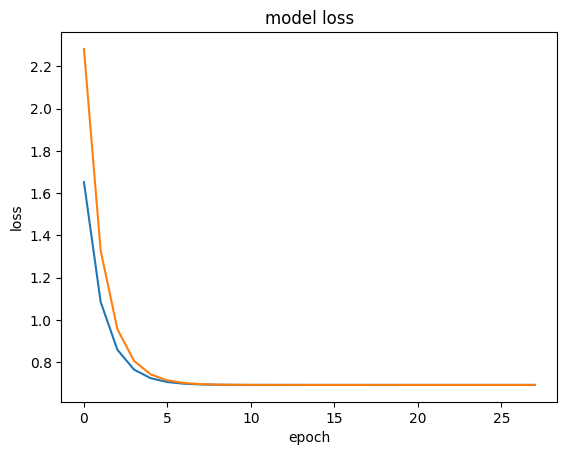

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.plot(history.history['val_loss'][1:])
plt.plot(history.history['loss'][1:])

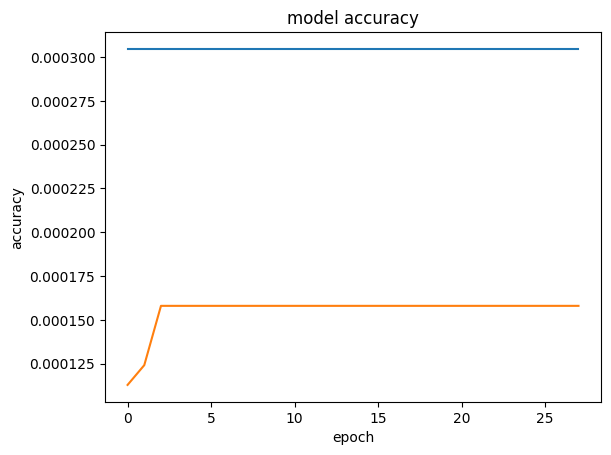

In [137]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(history.history['val_accuracy'][1:])
plt.plot(history.history['accuracy'][1:])

#### lightgbm Model

In [138]:
##############################################　　　自己加入的　　　##############################################
import lightgbm as lgb

cf = lgb.LGBMRegressor(n_estimators=5000)

print('---cf.fit---')
print(cf.fit(*train))
print('---cf.score---')
print(cf.score(*test))
print('---predict---')
print(cf.predict(test[0]))

---cf.fit---
LGBMRegressor(n_estimators=5000)
---cf.score---
-0.2423853773129383
---predict---
[0.17473493 0.14619246 0.27823067 ... 0.28138076 0.5466134  0.32704003]


##### 參數優化_1110

In [139]:
#import lightgbm

fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [test],
            'eval_names': ['valid'],
            'verbose': 100,
            'categorical_feature': 'auto'}

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMRegressor(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000) #LGBMClassifier
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [140]:
gs.fit(*train, **fit_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[40]	valid's auc: 0.551637
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.515378
Early stopping, best iteration is:
[81]	valid's auc: 0.51825
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[15]	valid's auc: 0.577413
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[60]	valid's auc: 0.553905
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[22]	valid's auc: 0.510085
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[10]	valid's auc: 0.576216
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[41]	valid's auc: 0.54313
Training until validation scores don't impr

RandomizedSearchCV(cv=3,
                   estimator=LGBMRegressor(metric='None', n_estimators=5000,
                                           n_jobs=4, random_state=314),
                   n_iter=100,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022C80D56E88>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022C79D63548>,
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022C7CD2EEC8>,
                                        'reg_alpha': [0, 0.1, 1, 2, 5, 7, 10,
           

In [141]:
print(gs.best_score_)
gs.best_estimator_

0.5710072060309196


LGBMRegressor(colsample_bytree=0.5793392441900451, metric='None',
              min_child_samples=183, min_child_weight=100.0, n_estimators=5000,
              n_jobs=4, num_leaves=47, random_state=314, reg_alpha=50,
              reg_lambda=100, subsample=0.5229986208802528)

In [142]:
#
#gs.best_estimator_
#LGBMClassifier(colsample_bytree=0.6433117836032942, metric='None',
#               min_child_samples=224, min_child_weight=1e-05, n_estimators=5000,
#               n_jobs=4, num_leaves=20, random_state=314, reg_alpha=10,
#               reg_lambda=10, subsample=0.8945613420997809)

In [143]:
##cf = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None,
##               colsample_bytree=0.4467801334566121, importance_type='split',
##               learning_rate=0.1, max_depth=-1, metric='None',
##               min_child_samples=107, min_child_weight=1, min_split_gain=0.0,
##               n_estimators=5000, n_jobs=4, num_leaves=43, objective=None,
##               random_state=314, reg_alpha=10, reg_lambda=100, silent=True,
##               subsample=0.40294551048668437, subsample_for_bin=200000,
##               subsample_freq=0)
##
##
##cf.fit(dataset_train[feature_names],dataset_train['return'] > 1.05, **fit_params)
##cf.score(dataset_test[feature_names],dataset_test['return'] > 1.05)
##下面那行調整中

In [144]:
##原本的上面那行
cf = lgb.LGBMRegressor(colsample_bytree=0.5550517967002531, metric='None',
              min_child_samples=170, n_estimators=5000, n_jobs=4, num_leaves=28,
              random_state=314, reg_alpha=50, reg_lambda=50,
              subsample=0.6173317263225124)

cf.fit(dataset_train[feature_names],dataset_train['return'] > 1.0, **fit_params)
cf.score(dataset_test[feature_names],dataset_test['return'] > 1.0)

Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.545589
Early stopping, best iteration is:
[76]	valid's auc: 0.546683


-0.011470208601984444

In [145]:
cf.feature_importances_

array([ 95,  86,  84, 105,  96,  69, 117,  91,  76,  73,  27,  70,  77,
        73,  50,  79,  51,  64,  75,  68,  50,  28,  24,  57,  36,  30,
        72,  56,  43,  59,  71])

<AxesSubplot:xlabel='Value', ylabel='Feature'>

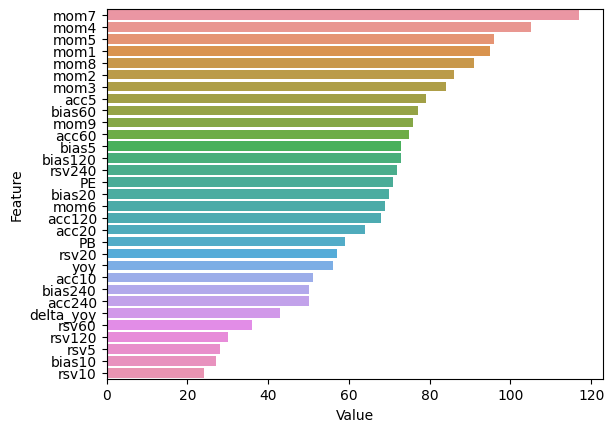

In [49]:
feature_imp = pd.DataFrame(zip(cf.feature_importances_, feature_names), 
                           columns=['Value','Feature']).sort_values('Value', ascending=False)
feature_imp

%matplotlib inline
import seaborn as sns
sns.barplot(x="Value", y="Feature", data=feature_imp)

In [50]:
#print(cf.fit(*train))

In [51]:
#import lightgbm as lgb
#gbm = lgb.LGBMClassifier(n_estimators=100, random_state=5, learning_rate=0.01)
#gbm.fit(dataset_train[feature_names], dataset_train['return'] > 1)

In [52]:
#import tqdm
#
#n = 3
#
#X = []
#y = []
#indexes = []
#dataset_scaled_x = dataset_scaled[feature_names]
#
#for i in tqdm.tqdm_notebook(range(0, len(dataset_scaled)-n)):
#    X.append(dataset_scaled_x.iloc[i:i+n].values)
#    y.append(dataset_scaled['return'].iloc[i+n-1])
#    indexes.append(dataset_scaled.index[i+n-1])
##dataset_scaled.head()

In [53]:
#import numpy as np
#X = np.array(X)
#y = np.array(y)

In [54]:
##import lightgbm as lgb
#cf = lgb.LGBMRegressor(colsample_bytree=0.7740467183023685, metric='None',
#               min_child_samples=395, min_child_weight=0.01, n_estimators=5000,
#               n_jobs=4, num_leaves=9, random_state=314, reg_alpha=5,
#               reg_lambda=10, subsample=0.4643892520208455)
#    
#cf.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

#### Random Forest Model

In [55]:
from sklearn.ensemble import RandomForestRegressor

cf2 = RandomForestRegressor(n_estimators=100)
cf2.fit(dataset_train[feature_names].astype(float), dataset_train[predi_target])  

RandomForestRegressor()

##### 參數優化_1110

In [56]:
#from scipy.stats import randint as sp_randint 
#from sklearn.model_selection import RandomizedSearchCV 
## build a classifier 
#cf2 = RandomForestRegressor(n_estimators=100) 
## specify parameters and distributions to sample from 
#param_dist = {"max_depth": [3, None], 
#              "max_features": sp_randint(1, 11), 
#              "min_samples_split": sp_randint(2, 11), 
#              "min_samples_leaf": sp_randint(1, 11), 
#              "bootstrap": [True, False], 
#              "criterion": ["mse", "mae"]} 
## run randomized search 
#n_iter_search = 20 
#rs = RandomizedSearchCV(cf2, param_distributions=param_dist, 
#                                   n_iter=n_iter_search) 

In [57]:
#rs.fit(dataset_train[features], dataset_train['return'] >1)

##### Split Train Test dataset

<AxesSubplot:xlabel='Value', ylabel='Feature'>

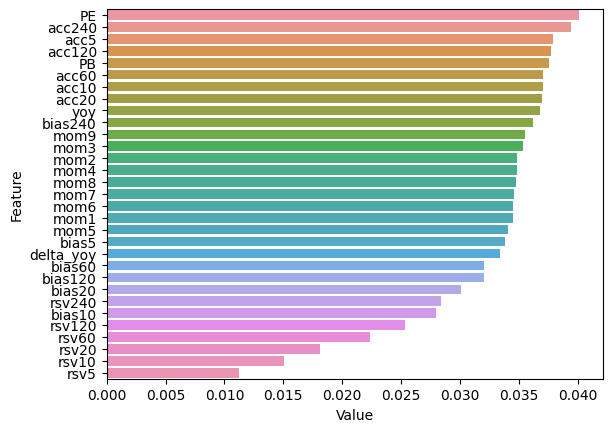

In [58]:
feature_imp = pd.DataFrame(zip(cf2.feature_importances_, feature_names), 
                           columns=['Value','Feature']).sort_values('Value', ascending=False)
feature_imp

%matplotlib inline
import seaborn as sns
sns.barplot(x="Value", y="Feature", data=feature_imp)

In [59]:
select = dataset.index.get_level_values('date') < '2022-03'
dataset_train = dataset[select]
dataset_test = dataset[~select]

### Ensemble learning

In [60]:
dataset_drop = dataset.dropna(subset=feature_names+['return'])

vals = model.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result1'] = pd.Series(vals.swapaxes(0,1)[0], dataset_drop.index)

vals = cf.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result2'] = pd.Series(vals, dataset_drop.index)

vals = cf2.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result3'] = pd.Series(vals, dataset_drop.index)

dataset_drop = dataset_drop.reset_index().set_index("date")

5185/5185 [==============================] - 5s 883us/step


## backtest

## 把量加進來做篩選
 * https://hahow.in/courses/5b9d3a6dca498a001e917383/shapeussions/60c96f5b018697e8a6131cbc

In [61]:
#把量加進來
vol=data.get('成交股數')/1000
vol_ma5=vol.rolling(5).mean()

vol_filter=vol_ma5>1000
vol_filter=vol_filter[vol_filter].fillna(0)
#vol_filter
t1 = vol_filter

In [62]:
#condition2

In [63]:
vol_filter = t1.reindex(every_month, method='ffill')#.loc['2010-02-15']
#vol_filter.loc['2010-02-15']

In [64]:
#t1 = vol_ma5.iloc[-1].dropna()
#t1.to_csv('./tmp/132.csv')
#t1.hist(bins=10)

In [65]:
#市值
#t1 = (predi_target >= predi_target.nlargest(20).iloc[-1]) * condition_Filter_v2.astype(float)()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 159/159 [00:09<00:00, 17.00it/s]


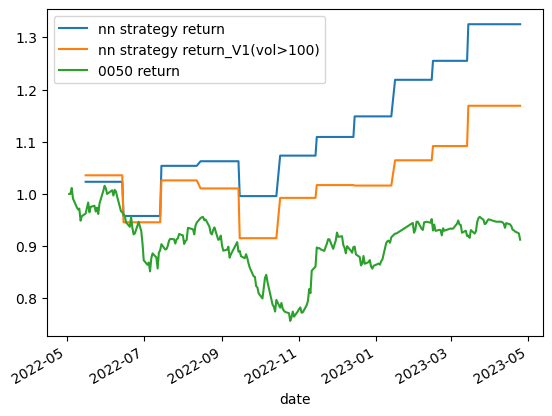

In [157]:
import math
from tqdm import tqdm

vol = 1000
test_period = '2022-05'

dates = sorted(list(set(dataset_drop.index)))

rs = []
rs_v1 = []
rs_v2 = []
rs_v3 = []

for d in tqdm(dates):
    #print(d)
    dataset_time = dataset_drop.loc[d]
    
    dataset_time = drop_extreme_case(dataset_time , feature_names , thresh=0.01)
    
    #print(dataset_time)
    
    predi_target = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
    
    #predi_target = predi_target * (dataset_time['vol_ma5'] >vol).astype(float)
            ###

    
    condition1 = dataset_time['vol_ma5'] > vol
    condition_Filter_v1 = condition1
    predi_target_v1 = predi_target * condition_Filter_v1.astype(float)
    
    condition2 = (1e9 < dataset_time['市值']) < 1e10
    
    condition_Filter_v2 =  condition1 + condition2
    predi_target_v2 = predi_target * condition_Filter_v2.astype(float)
    
    condition_P = (predi_target >= predi_target.nlargest(20).iloc[-1])
    condition_v1 = (predi_target_v1 >= predi_target_v1.nlargest(20).iloc[-1])
    condition_v2 = (predi_target_v2 >= predi_target_v2.nlargest(20).iloc[-1])
    
    predi_target = predi_target * (dataset_time['vol_ma5'] >vol).astype(float)
    condition_v3 = (predi_target >= predi_target.nlargest(20).iloc[-1]) & condition_Filter_v2 #.astype(float)
    
    #print(vol_filter.loc[d])
    #print(condition)
    
    r = dataset_time['return'][condition_P].mean()
    rs.append(r * (1-3/1000-1.425/1000*2*0.6))
    
    r_v1 = dataset_time['return'][condition_v1].mean()
    rs_v1.append(r_v1 * (1-3/1000-1.425/1000*2*0.6))    
    
    r_v2 = dataset_time['return'][condition_v2].mean()
    rs_v2.append(r_v2 * (1-3/1000-1.425/1000*2*0.6))    

    r_v3 = dataset_time['return'][condition_v3].mean()
    rs_v3.append(r_v3 * (1-3/1000-1.425/1000*2*0.6))    
        
rs = pd.Series(rs, index=dates)[test_period:].cumprod()
rs_v1 = pd.Series(rs_v1, index=dates)[test_period:].cumprod() #*
rs_v2 = pd.Series(rs_v2, index=dates)[test_period:].cumprod() #*
rs_v3 = pd.Series(rs_v3, index=dates)[test_period:].cumprod() #*

s0050 = close['0050'][test_period:]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'),
              'nn strategy return_V1(vol>100)':rs_v1.reindex(s0050.index, method='ffill'),
              #'nn strategy return_V2(vol+market cap)':rs_v2.reindex(s0050.index, method='ffill'),
              #'nn strategy return_V3(vol+market cap)':rs_v3.reindex(s0050.index, method='ffill'),
              '0050 return':s0050/s0050[0]
             }).plot()



import winsound
frequency = 2000
duration = 100
winsound.Beep(frequency, duration)

In [147]:
#import pickle
#
#return_history_1026 = pd.Series(rs, index=dates)['2021':].cumprod()
##eq = (gain[hold == 1].mean(axis=1)).fillna(1).cumprod()
#
#pickle.dump(rs, open('return_history_1026.pkl', 'wb'))

In [148]:
#import pyfolio as pf
#import pandas as pd
#
#close.index = close.index.tz_localize("Asia/Taipei")
##pf.create_returns_tear_sheet(close['0050'].pct_change())
#
## 得到 上一個單元的 回測結果
#ret = pickle.load(open("return_history_1026.pkl", "rb"))
#
## 將回測報酬率取出來
#ret = ret.pct_change().dropna()
#ret.index = pd.to_datetime(ret.index).tz_localize('Asia/Taipei')
#
## 利用pyfolio 比較報酬率
#pf.create_returns_tear_sheet(ret, benchmark_rets=close['0050'].pct_change())

### 當月持股狀況

35/35 [==============================] - 0s 1ms/step


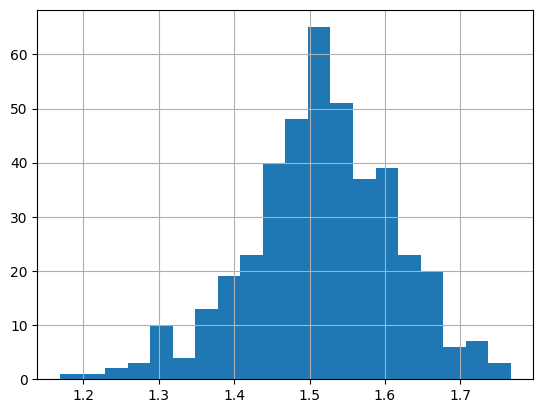

In [149]:
# get the latest dataset
last_date = dataset.index.levels[1].max()#"2022-10-15"
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()


last_dataset = drop_extreme_case(last_dataset, feature_names , thresh=0.01)
t1 = last_dataset

# remove NaN testcases
last_dataset = last_dataset.dropna(subset=feature_names)

# predict

vals = model.predict(last_dataset[feature_names].astype(float))
last_dataset['result1'] = pd.Series(vals.swapaxes(0,1)[0], last_dataset.index)

vals = cf.predict(last_dataset[feature_names].astype(float))
last_dataset['result2'] = pd.Series(vals, last_dataset.index)

vals = cf2.predict(last_dataset[feature_names].astype(float))
last_dataset['result3'] = pd.Series(vals, last_dataset.index)


# calculate score

predi_target = last_dataset['result1'] + last_dataset['result2'] + last_dataset['result3']

#
##predi_target = predi_target * vol_filter.iloc[-1] #******加上量的濾網


predi_target = predi_target * (last_dataset['vol_ma5'] >vol).astype(float)  #排除平均成交量小於MA1000張
#predi_target = predi_target * (last_dataset['市值'] < 1e10).astype(float)   #排除市值小於100億以下的股票

condition0 = (predi_target >= predi_target.nlargest(20).iloc[-1])
condition1 = last_dataset['vol_ma5'] >vol
condition2 = last_dataset['市值'] < 1e10

condition = condition0 & condition1 #& condition2

#vol_filter

# plot rank distribution
predi_target[predi_target!=0].hist(bins=20)


# show the best 20 stocks
slist1 = predi_target[condition].reset_index()['stock_id']

#https://keras-cn.readthedocs.io/en/latest/models/model/

In [150]:
last_date = dataset.index.levels[1].max()#"2022-10-15"
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()

In [151]:
#rank.sort_values(ascending=False).head(20)

## 平均分配資產於股票之中

In [152]:
close = data.get("收盤價")

money = 150000
stock_prices = close[slist1].iloc[-1]


print("股票平分張數:")
money / len(stock_prices) / stock_prices / 1000


股票平分張數:


stock_id
1102    0.170648
1434    0.267380
1904    0.231839
2027    0.172811
2801    0.428571
2812    0.535714
2834    0.541516
2885    0.334821
2887    0.438596
2890    0.450450
2892    0.278810
3264    0.141509
3558    0.027125
4566    0.114155
5243    0.117555
5457    0.138632
6176    0.066964
6203    0.107914
9904    0.238095
9939    0.076531
Name: 2023-04-25 00:00:00, dtype: float64

In [153]:
last_dataset['市值'][slist1]

stock_id  date      
1102      2023-04-15    1.547797e+11
1434      2023-04-15    4.767601e+10
1904      2023-04-15    3.197372e+10
2027      2023-04-15    9.199477e+10
2801      2023-04-15             NaN
2812      2023-04-15    6.743107e+10
2834      2023-04-15             NaN
2885      2023-04-15    2.831603e+11
2887      2023-04-15    2.190766e+11
2890      2023-04-15    1.923856e+11
2892      2023-04-15             NaN
3264      2023-04-15    2.813576e+10
3558      2023-04-15    1.542965e+10
4566      2023-04-15    3.981809e+09
5243      2023-04-15             NaN
5457      2023-04-15    9.909243e+09
6176      2023-04-15    5.208306e+10
6203      2023-04-15    5.876560e+09
9904      2023-04-15    9.444453e+10
9939      2023-04-15    2.906638e+10
Name: 市值, dtype: float64

In [154]:
last_dataset['vol_ma5'][slist1]

stock_id  date      
1102      2023-04-15     4043.0210
1434      2023-04-15     1082.3094
1904      2023-04-15     1027.4636
2027      2023-04-15     7675.6376
2801      2023-04-15     7472.2320
2812      2023-04-15     5578.7066
2834      2023-04-15    23671.2020
2885      2023-04-15    10836.3704
2887      2023-04-15    11356.2252
2890      2023-04-15    15040.0400
2892      2023-04-15     8417.1734
3264      2023-04-15     3894.1770
3558      2023-04-15     4315.3446
4566      2023-04-15     1064.4334
5243      2023-04-15     2493.5982
5457      2023-04-15     1102.0402
6176      2023-04-15     3929.0712
6203      2023-04-15     1176.1576
9904      2023-04-15     6641.1518
9939      2023-04-15     1035.9020
Name: vol_ma5, dtype: float64

###################################################################################################
## 移動窗格最佳化
[有空來試試看連結](https://hahow.in/courses/5b9d3a6dca498a001e917383/discussions/61b4c90147843d0006cf2593)
###################################################################################################

In [93]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def select(df):
    rank = df['pre']
    condition1 = (rank >= rank.nlargest(1).iloc[-1])
    return df['return'][condition1].mean() * (1-3/1000-1.425/1000*2*0.6)

end = 5
cf = lgb.LGBMRegressor(n_estimators=500)
train_time = ['2015','2016','2017','2018','2019']
s_time = ['2007','2008','2009','2010','2011']
test_time = ['2016','2017','2018','2019','2020']
store_mse = []

for time in range(end):
    print('%d 次執行中'%(time))
    dataset_dropna2_train = dataset_copy.loc[s_time[time]:train_time[time]] #2007~ 2015   2008~2016   2009~2017  2010~2018  ....
    dataset_dropna2_test = dataset_copy.loc[test_time[time]:test_time[time]]#            2016                2017               2018              2019  .....
    
    cf.fit(dataset_dropna2_train[feature_names].astype(float), dataset_dropna2_train['rank'])
    
    predict = cf.predict(dataset_dropna2_test[feature_names])
    dataset_dropna2_test['pre'] = predict
    dates = dataset_dropna2_test.index.get_level_values('date')
    b = dataset_dropna2_test.groupby(dates).apply(select).cumprod()
    s0050 = close['0050'][test_time[time]:test_time[time]]
    s0056 = close['0056'][test_time[time]:test_time[time]]
    pd.DataFrame({'Best 1 stocks return(include handling fee)':b.reindex(s0050.index, method='ffill'), 
                  '0050':s0050/s0050[0],'0056':s0056/s0056[0]}).plot()
    plt.ylabel('return')


0 次執行中


NameError: name 'dataset_copy' is not defined

In [ ]:
def mystrategy(data):

    close = data.get("收盤價", 120)

    vol = data.get('成交股數', 120)
 

    condition1 = close.max() / close.min()

    rev = data.get("當月營收", 14)

    condition2 = (rev.iloc[-1] / rev.iloc[-13])

    condition3 = (rev.iloc[-2] / rev.iloc[-14])

    稅後淨利 = data.get('本期淨利（淨損）', 5)

    # 股東權益，有兩個名稱，有些公司叫做權益總計，有些叫做權益總額，所以得把它們抓出來

    權益總計 = data.get('權益總計', 5)

    權益總額 = data.get('權益總額', 5)

    # 並且把它們合併起來

    權益總計.fillna(權益總額, inplace=True)

    roe = 稅後淨利 / 權益總計

    condition4 = roe.iloc[-1] / roe.iloc[-5]

    select_stock = (condition1.rank() + # 該數值越小越好

    condition2.rank(ascending=False) + # 該值越大越好 

    condition3.rank(ascending=False) + # 該值越大越好

    condition4.rank(ascending=False) # 該值越大越好 

    ).rank() <= 10
    
    df=select_stock[select_stock]
    vol=vol[df.index].iloc[-1]
    cond_vol=vol>(1000*1000)

    return cond_vol[cond_vol]


In [ ]:
stocks = mystrategy(data)
stocks

In [ ]:
    權益總計 = data.get('權益總計', 5)

    權益總額 = data.get('權益總額', 5)

    # 並且把它們合併起來

    權益總計.fillna(權益總額, inplace=True)

In [ ]:
權益總計

In [ ]:
close = data.get("收盤價", 120)
vol = data.get('成交股數', 120)
condition1 = close.max() / close.min()
rev = data.get("當月營收", 14)
condition2 = (rev.iloc[-1] / rev.iloc[-13])
condition3 = (rev.iloc[-2] / rev.iloc[-14])
稅後淨利 = data.get('本期淨利（淨損）', 5)
# 股東權益，有兩個名稱，有些公司叫做權益總計，有些叫做權益總額，所以得把它們抓出來
權益總計 = data.get('權益總計', 5)
權益總額 = data.get('權益總額', 5)
# 並且把它們合併起來
權益總計.fillna(權益總額, inplace=True)
roe = 稅後淨利 / 權益總計
condition4 = roe.iloc[-1] / roe.iloc[-5]
select_stock = (condition1.rank() + # 該數值越小越好
condition2.rank(ascending=False) + # 該值越大越好 
condition3.rank(ascending=False) + # 該值越大越好
condition4.rank(ascending=False) # 該值越大越好 
).rank() <= 10
df=select_stock[select_stock]
vol=vol[df.index].iloc[-1]
cond_vol=vol>(1000*1000)


In [ ]:
condition4